### 資料來源：政府開放資料平台 - 不動產買賣實價登錄批次資料 (http://data.gov.tw/node/6213) - 台北市資料

# 一、資料匯入

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='SimHei' #顯示中文
plt.rcParams['axes.unicode_minus']=False #正常顯示負號

pd.set_option("display.max_columns",50) #設定pandas最多顯示出50個欄位資訊

df = pd.read_csv('A_LVR_LAND_A.csv', encoding='big5') #台北市
df.sample(5) #隨機取其中5筆資料

,鄉鎮市區,交易標的,土地區段位置或建物區門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價每平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號
248,萬華區,房地(土地+建物),臺北市萬華區長順街14巷1弄1~30號,24.75,住,NaN,NaN,1060509,土地1建物1車位0,三層,四層,公寓(5樓含以下無電梯),工業用,鋼筋混凝土造,630819.0,83.55,4,2,2,有,無,7500000,89767.0,NaN,0.00,0,NaN,RPOPMLRJOHMFFBA87CA
813,中山區,房地(土地+建物)+車位,臺北市中山區遼寧街101巷1~30號,51.51,住,NaN,NaN,1060523,土地1建物1車位1,二層,八層,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,950124.0,225.10,4,2,2,有,有,53000000,235451.0,坡道平面,39.12,0,內含獨立產權車位，未包含在棟數內。含增建或未登記建物。,RPQQMLPKOHMFFCA18CA
824,南港區,車位,臺北市南港區昆陽街151~180號,3.38,住,NaN,NaN,1060116,土地0建物0車位2,地下一層，地下二層，地下三層,十七層,其他,停車空間,鋼筋混凝土造,1050908.0,85.29,0,0,0,有,有,5800000,NaN,坡道平面,85.28,5800000,NaN,SPPNMLPKOHMFFDA97CA
333,松山區,房地(土地+建物),臺北市松山區民權東路五段31~60號,9.44,其他,NaN,NaN,1060430,土地1建物1車位0,三層,七層,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,710630.0,56.87,2,1,1,有,有,10880000,191314.0,NaN,0.00,0,含增建或未登記建物。,RPTOMLQJOHMFFDA48DA
439,文山區,房地(土地+建物),臺北市文山區景文街163巷1~30號,10.92,商,NaN,NaN,1060405,土地1建物1車位0,一層,四層,公寓(5樓含以下無電梯),商業用,鋼筋混凝土造,NaN,31.06,3,2,2,有,無,4000000,128783.0,NaN,0.00,0,親友、員工或其他特殊關係間之交易。,RPQNMLQJOHMFFAA67CA


# 二、資料預處理(一)

## 2.1 交易標的：非土地、車位交易

In [2]:
df.groupby('交易標的').mean()

,土地移轉總面積平方公尺,非都市土地使用分區,非都市土地使用編定,交易年月日,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元,單價每平方公尺,車位移轉總面積平方公尺,車位總價元
交易標的,,,,,,,,,,,,,
土地,215.995593,NaN,NaN,1.059181e+06,NaN,0.000000,0.000000,0.000000,0.000000,7.343879e+06,123041.372881,0.000000,0.000000e+00
建物,0.000000,NaN,NaN,1.054469e+06,941057.222222,80.709000,1.000000,0.600000,1.100000,5.636200e+06,82164.800000,0.000000,0.000000e+00
房地(土地+建物),22.567617,NaN,NaN,1.059772e+06,765348.258373,86.596289,2.189453,1.447266,1.380859,1.472509e+07,166718.550781,0.000000,0.000000e+00
房地(土地+建物)+車位,36.521667,NaN,NaN,1.058768e+06,967275.413953,228.741806,2.430556,1.504630,1.597222,4.283112e+07,191406.018605,34.382361,1.393102e+06
車位,2.486136,NaN,NaN,1.060058e+06,908492.702703,41.700682,0.000000,0.000000,0.000000,2.502386e+06,NaN,30.595227,2.368295e+06


In [3]:
# 去除土地和車位兩種交易資料
df = df[(df['交易標的']!='土地') & (df['交易標的']!='車位')].reset_index(drop=True)

In [4]:
df.loc[:,'總價元'] = df.loc[:,'總價元']/10000 #改成以萬為單位，方便圖表顯示

In [5]:
df.groupby('交易標的').mean()

,土地移轉總面積平方公尺,非都市土地使用分區,非都市土地使用編定,交易年月日,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元,單價每平方公尺,車位移轉總面積平方公尺,車位總價元
交易標的,,,,,,,,,,,,,
建物,0.000000,NaN,NaN,1.054469e+06,941057.222222,80.709000,1.000000,0.600000,1.100000,563.620000,82164.800000,0.000000,0.000000e+00
房地(土地+建物),22.567617,NaN,NaN,1.059772e+06,765348.258373,86.596289,2.189453,1.447266,1.380859,1472.509301,166718.550781,0.000000,0.000000e+00
房地(土地+建物)+車位,36.521667,NaN,NaN,1.058768e+06,967275.413953,228.741806,2.430556,1.504630,1.597222,4283.111866,191406.018605,34.382361,1.393102e+06


## 2.2 產生特徵：交易年/屋齡

In [6]:
print(df.loc[0,'交易年月日'])
print(type(df.loc[0,'交易年月日']))

1040303
<class 'numpy.int64'>


In [7]:
for i in range(len(df)):
    df.loc[i,'交易年'] = round(df.loc[i,'交易年月日']/10000)

In [8]:
print(df.loc[0,'建築完成年月'])
print(type(df.loc[0,'建築完成年月']))

831111.0
<class 'numpy.float64'>


In [9]:
from datetime import datetime
now = datetime.now()
now.year #(年,月,日,時,分,秒,微秒) ps: 微秒(microseconds)=1/1000000秒

2017

In [10]:
for i in range(len(df)):
    df.loc[i,'建築完成年'] = round(df.loc[i,'建築完成年月']/10000)
    df.loc[i,'屋齡'] = now.year - 1911 - round(df.loc[i,'建築完成年月']/10000)

In [11]:
df.sample(1)

,鄉鎮市區,交易標的,土地區段位置或建物區門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價每平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號,交易年,建築完成年,屋齡
337,中山區,房地(土地+建物)+車位,臺北市中山區松江路64巷1~30號,15.2,商,NaN,NaN,1030728,土地1建物1車位1,六層,七層,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,1051230.0,102.15,0,0,1,無,有,2080.0,203622.0,升降機械,0.0,2250000,本買賣契約係經買賣雙方先行達成協議，受託地政士僅承辦物權移轉登記，無介入其私權任何問題。雨遮...,RPWPMLPKOHMFFCA68CA,103.0,105.0,1.0


# 三、資料探索

## 3.1 各鄉鎮資料筆數

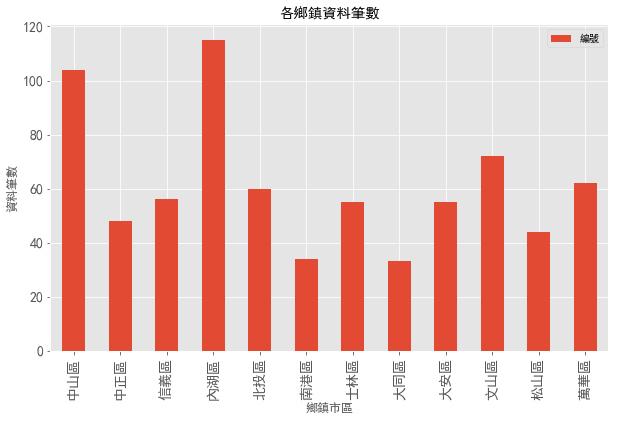

In [12]:
ax = df.groupby('鄉鎮市區').count().plot(kind='bar',y='編號',figsize=(10,6),fontsize=14,title='各鄉鎮資料筆數')
ax.set_ylabel('資料筆數')

## 3.2 相關性分析

In [13]:
corr = df[['總價元','土地移轉總面積平方公尺','建物移轉總面積平方公尺','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','車位移轉總面積平方公尺','車位總價元','屋齡','建築完成年','交易年']].corr()
corr

,總價元,土地移轉總面積平方公尺,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年
總價元,1.000000,0.718356,0.897664,0.037094,-0.051536,0.062915,0.472775,0.517171,-0.351787,0.351787,-0.044518
土地移轉總面積平方公尺,0.718356,1.000000,0.837357,0.218130,0.107488,0.168725,0.236906,0.215380,-0.090268,0.090268,0.006141
建物移轉總面積平方公尺,0.897664,0.837357,1.000000,0.072909,-0.027742,0.056027,0.451150,0.384596,-0.303746,0.303746,-0.048933
建物現況格局-房,0.037094,0.218130,0.072909,1.000000,0.664950,0.761660,0.016739,-0.012425,0.101536,-0.101536,-0.032178
建物現況格局-廳,-0.051536,0.107488,-0.027742,0.664950,1.000000,0.547287,-0.049335,-0.076489,0.051712,-0.051712,-0.001068
建物現況格局-衛,0.062915,0.168725,0.056027,0.761660,0.547287,1.000000,0.009501,-0.009853,-0.025424,0.025424,-0.070500
車位移轉總面積平方公尺,0.472775,0.236906,0.451150,0.016739,-0.049335,0.009501,1.000000,0.741627,-0.462698,0.462698,-0.096084
車位總價元,0.517171,0.215380,0.384596,-0.012425,-0.076489,-0.009853,0.741627,1.000000,-0.357414,0.357414,-0.061319
屋齡,-0.351787,-0.090268,-0.303746,0.101536,0.051712,-0.025424,-0.462698,-0.357414,1.000000,-1.000000,0.142024
建築完成年,0.351787,0.090268,0.303746,-0.101536,-0.051712,0.025424,0.462698,0.357414,-1.000000,1.000000,-0.142024


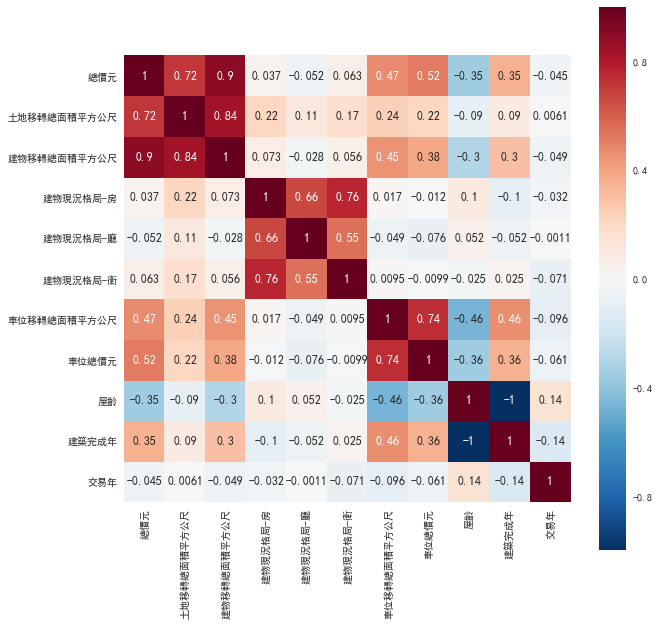

In [14]:
import seaborn as sns
plt.rcParams['font.family']='SimHei' #顯示中文
plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, annot=True)
sns.plt.show()

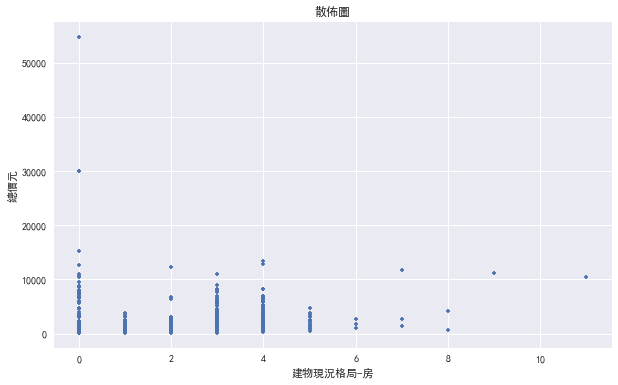

In [15]:
df.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='建物現況格局-房',y='總價元',marker='+')

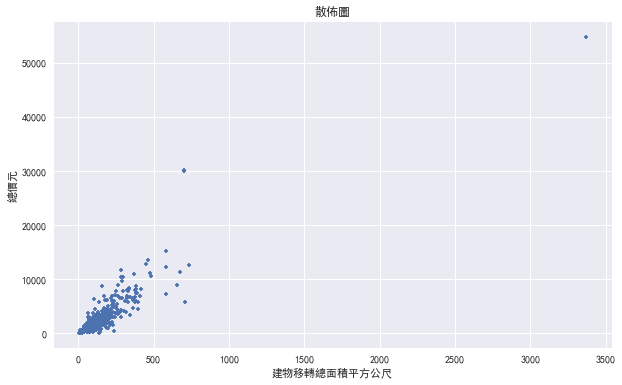

In [16]:
df.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='建物移轉總面積平方公尺',y='總價元',marker='+')

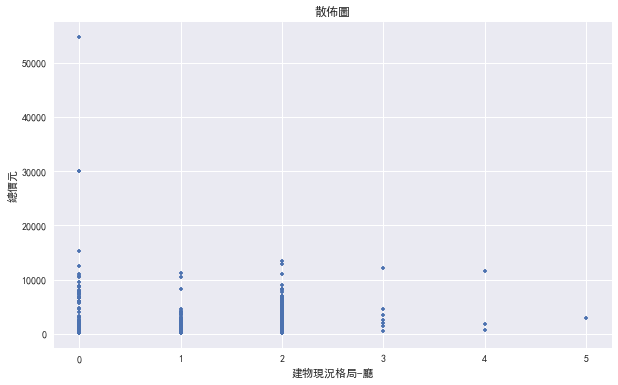

In [17]:
df.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='建物現況格局-廳',y='總價元',marker='+')

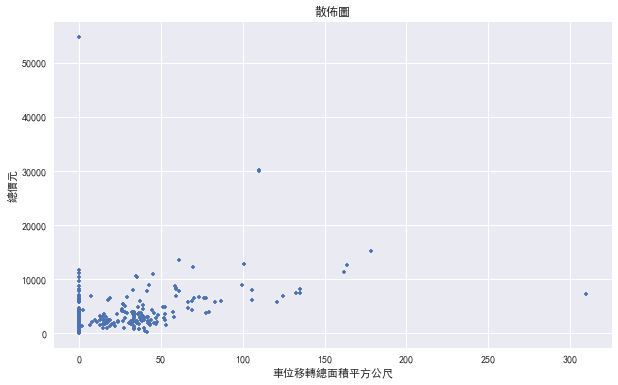

In [18]:
df.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='車位移轉總面積平方公尺',y='總價元',marker='+')

## 3.3 各鄉鎮比較

In [19]:
df2 = df[['鄉鎮市區','土地移轉總面積平方公尺','建物移轉總面積平方公尺','單價每平方公尺','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','車位移轉總面積平方公尺','車位總價元','屋齡','建築完成年','交易年','總價元']]
df2.groupby('鄉鎮市區').mean()

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,總價元
鄉鎮市區,,,,,,,,,,,,
中山區,16.297692,105.000096,182520.461538,2.076923,1.375000,1.519231,7.903173,479519.230769,20.096774,85.903226,105.903846,2139.697917
中正區,17.749583,113.277500,203961.895833,1.708333,1.145833,1.187500,5.110417,277083.333333,22.743590,83.256410,105.833333,2477.166704
信義區,28.029821,127.634286,189706.750000,2.267857,1.428571,1.446429,8.865714,298214.285714,27.780488,78.219512,105.946429,2314.053964
內湖區,37.064609,182.183652,162547.035088,2.521739,1.530435,1.547826,17.334609,478695.652174,19.176991,86.823009,105.652174,2892.934783
北投區,28.839167,133.713000,142094.283333,2.050000,1.366667,1.350000,17.170833,734166.666667,19.016667,86.983333,105.866667,1960.550000
南港區,31.355000,156.041176,164861.647059,2.294118,1.529412,1.500000,15.133824,555882.352941,14.142857,91.857143,105.970588,2641.029412
士林區,33.232364,148.830000,179288.290909,2.309091,1.563636,1.545455,15.637818,938181.818182,28.109091,77.890909,106.000000,3244.573075
大同區,18.098182,108.097576,142900.272727,2.212121,1.454545,1.303030,7.021212,192424.242424,22.185185,83.814815,105.909091,1549.110000
大安區,22.519455,126.577636,247827.327273,2.163636,1.436364,1.400000,6.381818,252727.272727,23.722222,82.277778,106.000000,3099.045173


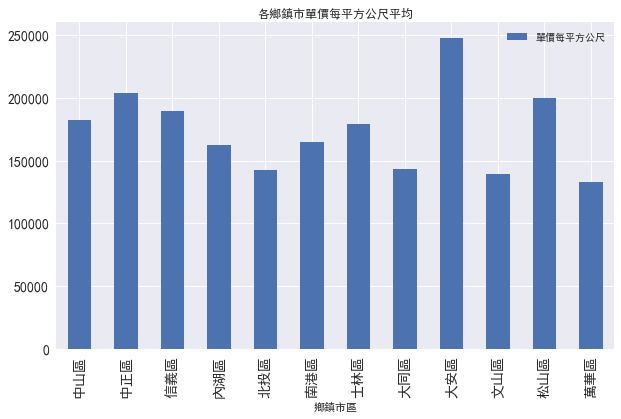

In [20]:
df2.groupby('鄉鎮市區').mean().plot(kind='bar',y='單價每平方公尺',figsize=(10,6),fontsize=14,title='各鄉鎮市單價每平方公尺平均')

# 四、資料預處理(二) - 機器學習

## 4.1 針對鄉鎮市區做one-hot encoding

In [21]:
df_region = pd.get_dummies(df['鄉鎮市區'])
df_region.head()

,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [22]:
df_ml = pd.merge(df2,df_region,left_index=True,right_index=True)
df_ml.head()

,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,總價元,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
0,大同區,6.34,55.19,233738.0,1,1,1,0.00,0,23.0,83.0,104.0,1290.0,0,0,0,0,0,0,0,1,0,0,0,0
1,內湖區,4.96,38.79,110853.0,1,1,1,0.00,0,21.0,85.0,105.0,430.0,0,0,0,1,0,0,0,0,0,0,0,0
2,內湖區,13.72,149.24,160815.0,3,2,2,12.96,0,9.0,97.0,105.0,2400.0,0,0,0,1,0,0,0,0,0,0,0,0
3,內湖區,22.45,136.20,149046.0,3,2,1,34.60,0,9.0,97.0,105.0,2030.0,0,0,0,1,0,0,0,0,0,0,0,0
4,內湖區,33.51,242.78,197216.0,5,2,2,51.07,0,13.0,93.0,105.0,4788.0,0,0,0,1,0,0,0,0,0,0,0,0


## 4.2 去除遺失值和極端值

In [23]:
df_ml = df_ml.dropna().reset_index(drop=True)

In [24]:
df_ml = df_ml[df_ml['建物移轉總面積平方公尺']<1000]

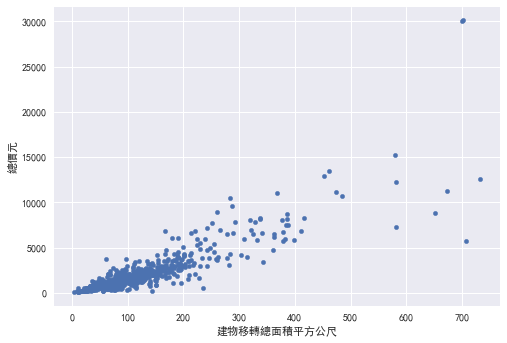

In [25]:
df_ml.plot(kind='scatter',x='建物移轉總面積平方公尺',y='總價元')

# 五、簡單線性回歸

## 5.1 使用Scikit-Learn SGDRegressor
### 5.1.1 切分訓練及測試資料 (1 feature)  
##### PS: 這裡的測試資料可視為驗證資料集CV (最後的測試資料應另外保留)

In [26]:
from sklearn.model_selection import train_test_split

X = df_ml[['建物移轉總面積平方公尺']]
y = df_ml[['總價元']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積平方公尺
171,35.62
572,100.77
87,75.74
391,60.97
7,133.73


### 5.1.2 特徵標準化(Standardization)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_normalized = sc.transform(X_train)
X_test_normalized = sc.transform(X_test)

各變項參數: [ 2086.61684832]
MSE: 2199791.09
R Square: 0.746919799713


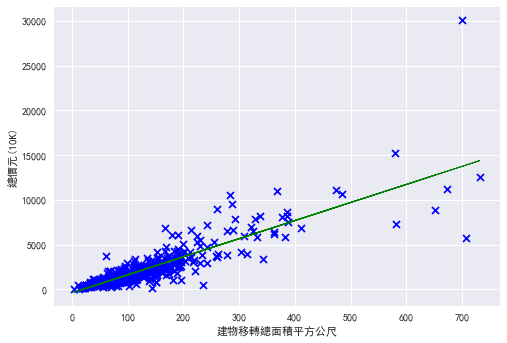

In [28]:
from sklearn import datasets, linear_model

#SGDRegressor的input y需要一維矩陣type
y_train_1d = y_train.values.ravel()
y_test_1d = y_test.values.ravel()

# linear regression 物件
sgdr = linear_model.SGDRegressor(max_iter=10,learning_rate='constant',eta0=0.001)

# 訓練模型
sgdr.fit(X_train_normalized, y_train_1d)

print('各變項參數:', sgdr.coef_)
print("MSE: %.2f" % np.mean((sgdr.predict(X_test_normalized) - y_test_1d) ** 2))
print("R Square:",sgdr.score(X_test_normalized,y_test))

plt.scatter(X_train, y_train_1d,  color='blue', marker = 'x')

plt.plot(X_train, sgdr.predict(X_train_normalized), color='green', linewidth=1)

plt.ylabel('總價元(10K)')
plt.xlabel('建物移轉總面積平方公尺')

plt.show()

### 5.1.3 K折交叉驗證 (K-fold Cross-Validation) + 學習曲線 (Learning Curve)

In [29]:
# Scikit-Learn 官網作圖函式
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


<module 'matplotlib.pyplot' from '/Users/pyda/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

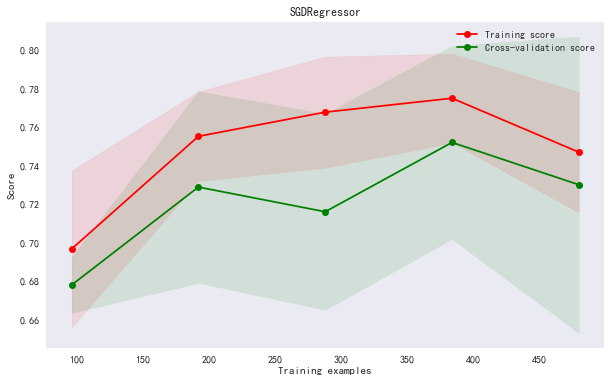

In [30]:
from sklearn.model_selection import KFold,StratifiedKFold

cv = KFold(n_splits=4, random_state=None, shuffle=True)
estimator = linear_model.SGDRegressor(max_iter=1000,learning_rate='constant',eta0=0.01)

sc.fit(X_train)
plot_learning_curve(estimator, "SGDRegressor", sc.transform(X), y.values.ravel(), cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

## 5.2 使用Scikit-Learn LinearRegression

各變項參數: [[ 2113.64628481]]
MSE: 2165122.18
R Square: 0.750908367217


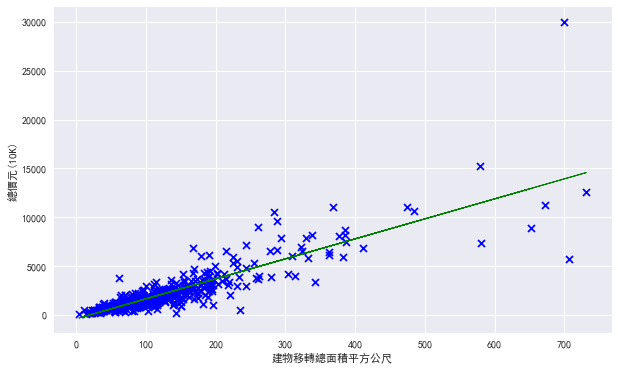

In [31]:
# linear regression
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_normalized, y_train)

print('各變項參數:', regr.coef_)
print("MSE: %.2f" % np.mean((regr.predict(X_test_normalized) - y_test) ** 2))
print("R Square:",regr.score(X_test_normalized,y_test))

plt.figure(figsize=(10,6))  #調整作圖大小
plt.scatter(X_train, y_train,  color='blue', marker = 'x')
plt.plot(X_train, regr.predict(X_train_normalized), color='green', linewidth=1)

plt.ylabel('總價元(10K)')
plt.xlabel('建物移轉總面積平方公尺')

plt.show()

<module 'matplotlib.pyplot' from '/Users/pyda/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

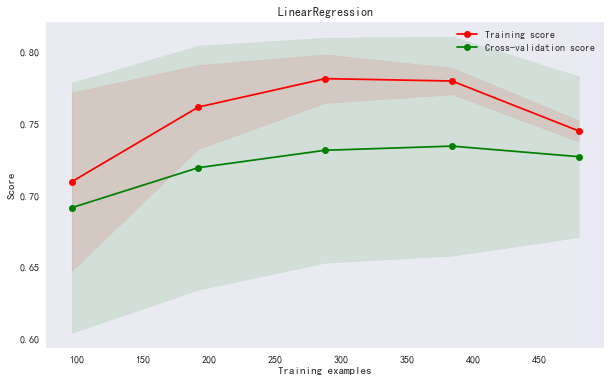

In [32]:
cv = KFold(n_splits=4, random_state=None, shuffle=True)
estimator = linear_model.LinearRegression()

sc.fit(X_train)
plot_learning_curve(estimator, "LinearRegression", sc.transform(X), y.values.ravel(), cv=cv , train_sizes=np.linspace(0.2, 1.0, 5))

## 六、多變項線性迴歸
### 6.1 切分訓練及測試資料 (2 features)

In [33]:
X = df_ml[['建物移轉總面積平方公尺','屋齡']]
y = df_ml[['總價元']]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積平方公尺,屋齡
462,40.85,22.0
576,138.36,15.0
340,245.95,3.0
611,158.43,24.0
144,202.83,8.0


### 6.1 特徵標準化 (Standardization)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_normalized = sc.transform(X_train)
X_test_normalized = sc.transform(X_test)

### 6.2 使用Scikit-Learn LinearRegression

In [36]:
# linear regression 物件
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_normalized, y_train)

print('各變項參數:', regr.coef_)
print("MSE: %.2f" % np.mean((regr.predict(X_test_normalized) - y_test) ** 2))
print("R Square:",regr.score(X_test_normalized, y_test))

各變項參數: [[ 2333.18185783  -171.90571882]]
MSE: 1039409.73
R Square: 0.772107752519


<module 'matplotlib.pyplot' from '/Users/pyda/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

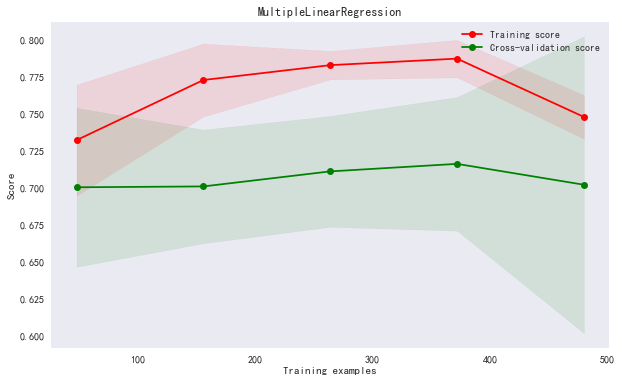

In [37]:
#cv = ShuffleSplit(n_splits=3, random_state=None, test_size=0.3)
cv = KFold(n_splits=4, random_state=None, shuffle=True)
estimator = linear_model.LinearRegression()

sc.fit(X_train)
plot_learning_curve(estimator, "MultipleLinearRegression", sc.transform(X), y.values.ravel(), cv=cv , train_sizes=np.linspace(0.1, 1.0, 5))

### 6.3 使用Scikit-Learn SGDRegressor

In [38]:
y_train_1d = y_train.values.ravel()
y_test_1d = y_test.values.ravel()

# SGD Regressor 
sgdr = linear_model.SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)

# 訓練模型
sgdr.fit(X_train_normalized, y_train_1d)

print('各變項參數:', sgdr.coef_)
print("MSE: %.2f" % np.mean((sgdr.predict(X_test_normalized) - y_test_1d) ** 2))
print("R Square:",sgdr.score(X_test_normalized,y_test_1d))

各變項參數: [ 2867.02223143  -198.25728773]
MSE: 1572776.51
R Square: 0.655166232046


<module 'matplotlib.pyplot' from '/Users/pyda/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

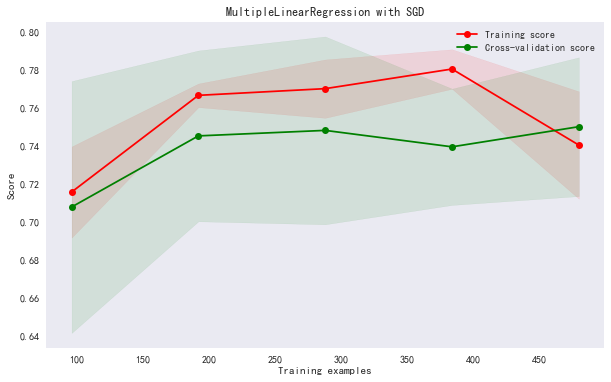

In [39]:
from sklearn.model_selection import ShuffleSplit
cv = KFold(n_splits=4, random_state=None, shuffle=True)
#cv = ShuffleSplit(n_splits=3, random_state=None, test_size=0.3)
estimator = linear_model.SGDRegressor(max_iter=1000,learning_rate='constant',eta0=0.01)

plot_learning_curve(estimator, "MultipleLinearRegression with SGD", sc.transform(X), y.values.ravel(), cv=cv , train_sizes=np.linspace(0.2, 1.0, 5))

## 七、多項式(Polynomial) 非線性迴歸
### 切分訓練及測試資料 (1 feature)

In [40]:
from sklearn.model_selection import train_test_split
X = df_ml[['建物移轉總面積平方公尺']]
y = df_ml[['總價元']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積平方公尺
285,112.93
486,84.35
392,195.73
386,103.83
258,255.85


### 創造高次方變項

各變項參數: 
 [[  0.00000000e+00   1.89639704e+01   3.60003973e-03]]
MSE: 1784004.56
R Square: 0.75142662314


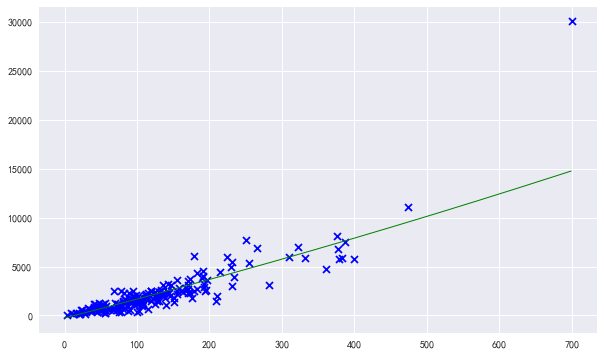

In [41]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2)
X_train_raw = X_train.copy() #原始X_train
X_test_raw = X_test.copy() #原始X_test
X_train_poly = quadratic.fit_transform(X_train_raw) #產生x^0, x^1, x^2
X_test_poly = quadratic.fit_transform(X_test_raw) #產生x^0, x^1, x^2

# linear regression 物件
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_poly, y_train)

print('各變項參數: \n', regr.coef_)
print("MSE: %.2f" % np.mean((regr.predict(X_test_poly) - y_test) ** 2))
print("R Square:",regr.score(X_test_poly, y_test))

# Plot outputs
plt.figure(figsize=(10,6))
plt.scatter(X_test_raw, y_test,  color='blue', marker = 'x')

X_fit = pd.DataFrame(np.arange(0,700,1)) #作圖用
plt.plot(X_fit, regr.predict(quadratic.fit_transform(X_fit)), color='green', linewidth=1)


plt.show()

In [42]:
quadratic = PolynomialFeatures(degree=2)
X_raw = X.copy() #原始X_train
X_poly = quadratic.fit_transform(X_raw) #產生x^0, x^1, x^2

<module 'matplotlib.pyplot' from '/Users/pyda/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

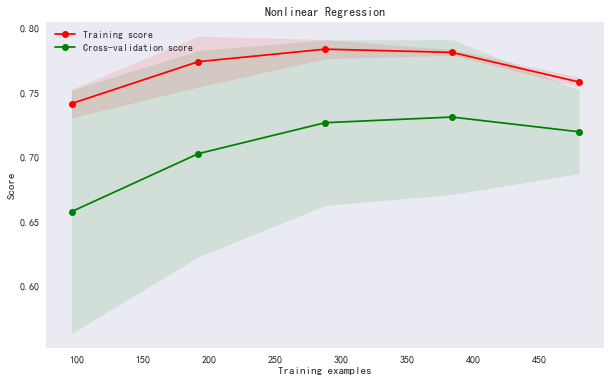

In [43]:
cv = KFold(n_splits=4, random_state=None, shuffle=True)
estimator = linear_model.LinearRegression()
plot_learning_curve(estimator, "Nonlinear Regression", X_poly, y, cv=cv,train_sizes=np.linspace(0.2, 1.0, 5))

## 補充：自造簡單線性迴歸 Gradient Descent

In [44]:
def computeCost(X, y, weight=np.array([[0,0]])):
    m = y.size
    J = 0
    h = X.dot(weight)
    J = 1/(2*m)*np.sum(np.square(h-y))
    return(J)

def gradientDescent(X, y, weight=np.array([[0,0]]), alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iters in np.arange(num_iters):
        h = X.dot(weight)
        weight = weight - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iters] = computeCost(X, y, weight)
    return(weight, J_history)

In [45]:
X = df_ml[['建物移轉總面積平方公尺']]
y = df_ml[['總價元']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積平方公尺
20,60.21
1,38.79
431,51.32
532,56.25
203,94.04


In [46]:
sc.fit(X_train)
X_train_normalized = sc.transform(X_train)

weight:  [ 2495.35145712  2495.35145712]


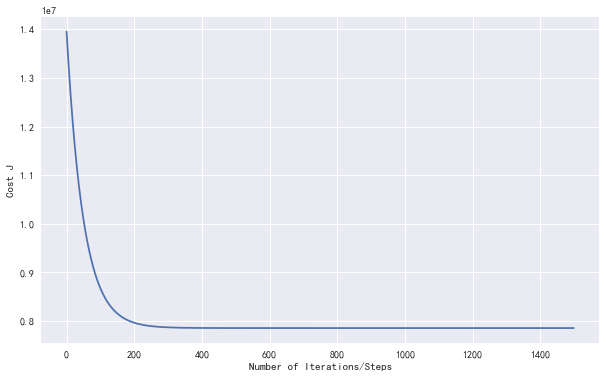

In [47]:
# theta for minimized cost J
weight , Cost_J = gradientDescent(X_train_normalized, y_train.values)

print('weight: ',weight.ravel())
plt.figure(figsize=(10,6))
plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Number of Iterations/Steps');